<a href="https://colab.research.google.com/github/kubamamut/Eksploracja_Danych/blob/main/Zaj%C4%99cia_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#1
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

titanic = sns.load_dataset("titanic")
print ( df . shape )
print ( df . head () )
#Przygotowanie danych
features = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
target = "survived"

data = titanic[features + [target]].copy()

num_cols = ["age", "sibsp", "parch", "fare", "pclass"]
cat_cols = ["sex", "embarked"]

for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

X = data_encoded.drop(columns=[target])
y = data_encoded[target]

#Podział danych
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Test różnych głębokości drzewa
max_depth_values = [2, 3, 5, 7, 10, None]
results = []

for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    results.append({
        "max_depth": depth if depth is not None else "None",
        "accuracy": acc
    })

#Wyniki
results_df = pd.DataFrame(results)
print("\nWyniki drzewa decyzyjnego:")
print(results_df)

#Wybór najlepszego modelu
best_idx = results_df["accuracy"].idxmax()
best_depth = results_df.loc[best_idx, "max_depth"]
print("\nNajlepsze max_depth:", best_depth)

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Wyniki drzewa decyzyjnego:
  max_depth  accuracy
0         2  0.768657
1         3  0.794776
2         5  0.791045
3         7  0.798507
4        10  0.772388
5      None  0.768657

Najlepsze max_depth: 7


k =  1  ->  accuracy = 0.7678
k =  3  ->  accuracy = 0.7378
k =  5  ->  accuracy = 0.7603
k =  7  ->  accuracy = 0.7266
k =  9  ->  accuracy = 0.7640
k = 11  ->  accuracy = 0.7753
k = 15  ->  accuracy = 0.7753


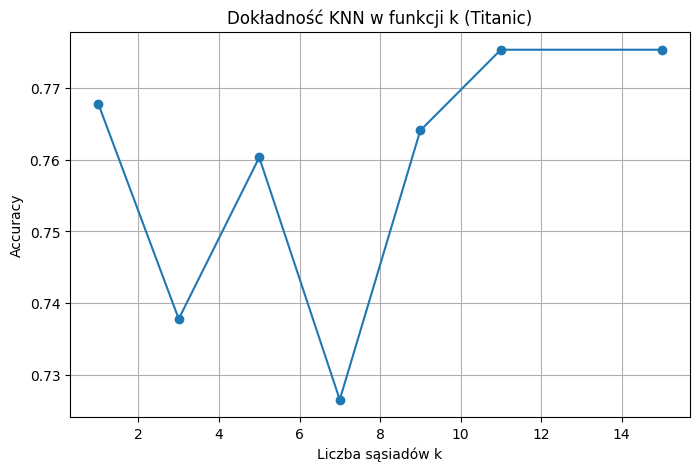


Najlepsze k: 11, accuracy = 0.7753


In [6]:
#2
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = sns.load_dataset('titanic')

cols_to_drop = ['deck', 'embark_town', 'alive', 'who', 'adult_male']
df_clean = df.drop(columns=cols_to_drop)
df_clean = df_clean.dropna(subset=['embarked'])

#Uzupełniamy braki wieku medianą
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())

#One-hot encoding dla: sex, embarked, class
df_encoded = pd.get_dummies(
    df_clean,
    columns=['sex', 'embarked', 'class'],
    drop_first=True
)

X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

#Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

#Normalizacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Eksperyment z KNN – różne wartości k
k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"k = {k:2d}  ->  accuracy = {acc:.4f}")

#Wykres: accuracy w funkcji k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Liczba sąsiadów k")
plt.ylabel("Accuracy")
plt.title("Dokładność KNN w funkcji k (Titanic)")
plt.grid(True)
plt.show()

#Wybór najlepszego k
best_idx = int(np.argmax(accuracies))
best_k = k_values[best_idx]
best_acc = accuracies[best_idx]

print(f"\nNajlepsze k: {best_k}, accuracy = {best_acc:.4f}")
